In [1]:
# import required packages
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.feature_selection import r_regression, SelectKBest
from sklearn.svm import SVR, SVC
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import ConfusionMatrixDisplay, precision_score, recall_score, mean_squared_error, precision_recall_curve, PrecisionRecallDisplay
import matplotlib.pyplot as plt  # For creating plots
from scipy.stats import ttest_ind

For today's lab, you will need to study and use the scikit-learn API described on [here](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics)

**Question 1**: Load the concrete strength dataset (*Concrete_Strength_Data.csv*) using numpy. This is a regression dataset and the last column represents the quantity to be predicted.
**Solution**: Use the function [`genfromtxt'](https://numpy.org/doc/stable/reference/generated/numpy.genfromtxt.html) to load the dataset.

In [2]:
csd = np.genfromtxt('Concrete_Strength_Data.csv', delimiter=',', skip_header=True)
csd.shape

(1030, 9)

**Question 2**: Train an SVM for the concrete strength dataset. Evaluate your model using R2, MSE and RMSE.

In [3]:
# split the dataset into training and testing
x_train, x_test, y_train, y_test = train_test_split(csd[:, :-1], csd[:, -1], test_size=0.2)

In [4]:
# train a support vector machine using the concrete strength dataset
# vary the hyperparameter settings to achieve best performance
svc_csd = SVR(C=50)
svc_csd.fit(x_train, y_train)

SVR(C=50)

In [5]:
# compute classification accuracy
clf_acc = svc_csd.score(x_test, y_test)
print(clf_acc)

0.6938537637631141


In [6]:
y_pred2 = svc_csd.predict(x_test)
print(f'Mean squared error: {mean_squared_error(y_test, y_pred2)}')

Mean squared error: 72.02425711312141


In [7]:
y_pred2 = svc_csd.predict(x_test)
print(f'Mean squared error: {mean_squared_error(y_test, y_pred2, squared=False)}')

Mean squared error: 8.486710617967447


**Question 3**: Compute the value of MSE manually using the functionality available in numpy. You can compute the predictions using sklearn.

In [8]:
mse = np.sum((y_test - y_pred2)**2) / y_test.size
print(mse)

72.02425711312141


In [9]:
rmse = np.sqrt(np.sum((y_test - y_pred2)**2) / y_test.size)
print(rmse)

8.486710617967447


**Question 4**: Load the hotel reservations dataset (*hotel_res.csv*) using numpy. This is a classification dataset and the last column represents the actual class labels.
**Solution**: Use the function [`genfromtxt'](https://numpy.org/doc/stable/reference/generated/numpy.genfromtxt.html) to load the dataset.

In [10]:
hr = np.genfromtxt('hotel_res.csv', delimiter=',')
hr.shape

(36275, 18)

**Question 5**: Train an SVM for the hotel reservation dataset. Evaluate your model using classification accuracy, precision and recall metrics.

In [11]:
# split the dataset into training and testing
x_train2, x_test2, y_train2, y_test2 = train_test_split(hr[:, :-1], hr[:, -1], test_size=0.2)

In [12]:
# train a support vector machine using the concrete strength dataset
# vary the hyperparameter settings to achieve best performance
svc_hr = SVC(C=50)
svc_hr.fit(x_train2, y_train2)

SVC(C=50)

In [13]:
# compute classification accuracy
clf_acc = svc_hr.score(x_test2, y_test2)
print(clf_acc)

0.7516195727084769


In [14]:
# compute predictions for the testing samples and then compute precision
y_pred2 = svc_hr.predict(x_test2)
prec = precision_score(y_test2, y_pred2)
print(prec)

0.7474715042542944


In [15]:
# compute predictions for the testing samples and then compute recall
y_pred2 = svc_hr.predict(x_test2)
recl = recall_score(y_test2, y_pred2)
print(recl)

0.953121801432958


**Question 6**: Compute the metrics from question 6 manually i.e. without using the sklearn API. You can compute the predictions using sklearn.

In [68]:
# compute model predictions for the testing samples
y_pred2 = svc_hr.predict(x_test2)
# estimate the number of samples from class 1 that are correctly classified (True Positives)
tp_count = np.sum(np.logical_and(y_test2 == 1, y_test2 == y_pred2))
# estimate the number of samples for which the model prediction is class 1
n_class1_pred = np.sum(y_pred2 == 1)
# compute precision
prec = tp_count / n_class1_pred
print(prec)

0.7514106077704337


In [69]:
# compute model predictions for the testing samples
y_pred2 = svc_hr.predict(x_test2)
# estimate the number of samples from class 1 that are correctly classified (True Positives)
tp_count = np.sum(np.logical_and(y_test2 == 1, y_test2 == y_pred2))
# estimate the number of samples which are actually from class 1
n_class1 = np.sum(y_test2 == 1)
# compute precision
recall = tp_count / n_class1
print(recall)

0.9555145551455515


**Question 7**: Precision-recall curve shows the tradeoff between Precision and Recall for different values of the threshold. Plot the Precision Recall curve for your trained model.

In [21]:
# Train the SVM for the hotel reservation dataset
svc_hr = SVC()
svc_hr.fit(x_train2, y_train2)

SVC()

In [22]:
# Estimate the SVM output for each sample in your testing split
dec_value = svc_hr.decision_function(x_test2)

In [23]:
# compute precision and recall for different values of the threshold
precision, recall, threshold = precision_recall_curve(y_test2, dec_value)

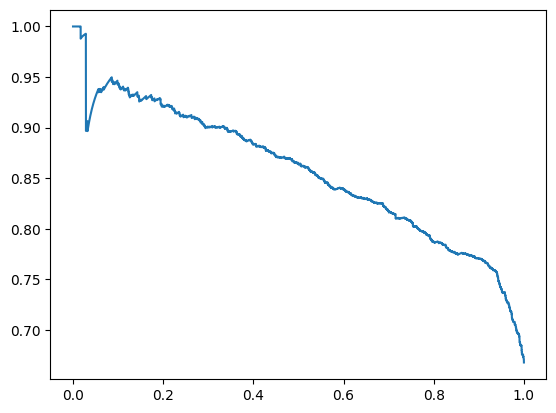

In [26]:
# plot the precision recall curve.
plt.plot(recall, precision)

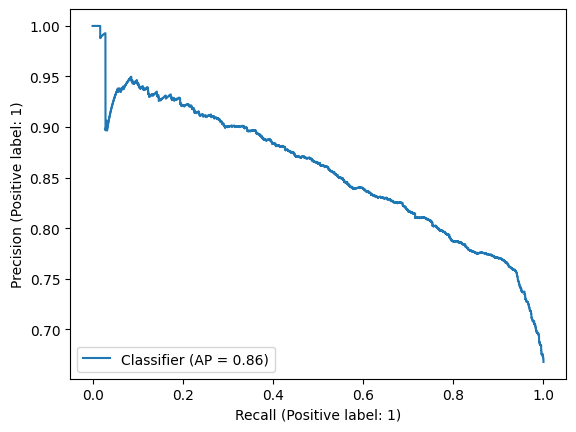

In [27]:
# plot the precision recall curve (Shortcut method)
PrecisionRecallDisplay.from_predictions(y_test2, dec_value)

**Question 8**: Build a classifier using Multilayer Perceptron for the hotel reservation dataset. Apply T-test to compare the results of 10-fold CV for MLP and SVM, and analyze your results.

In [29]:
# compute CV results for MLP
mlp_hr = MLPClassifier()
mlp_hr.fit(x_train2, y_train2)
mlp_scores = cross_val_score(mlp_hr, x_test2, y_test2, cv=10)

# compute CV results for SVC
svc_hr = SVC()
svc_hr.fit(x_train2, y_train2)
svc_scores = cross_val_score(svc_hr, x_test2, y_test2, cv=10)

In [34]:
ttest_ind(svc_scores, mlp_scores)

Ttest_indResult(statistic=1.257845818273626, pvalue=0.2439196167141703)